In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Installing Pytorch 

In [2]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html


Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61f50000 @  0x7f9fba2762a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


Installing Fastai

In [5]:
!pip install fastai==1.0.28


    100% |████████████████████████████████| 122kB 3.7MB/s 
    100% |████████████████████████████████| 23.3MB 2.1MB/s 
    100% |████████████████████████████████| 112kB 24.4MB/s 
    100% |████████████████████████████████| 61kB 26.9MB/s 
    100% |████████████████████████████████| 1.9MB 15.0MB/s 
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
  Running setup.py bdist_wheel for wrapt ... - \ done
  Stored in directory: /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built bottleneck wrapt
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
torchvision-nightly 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: wrapt 1.11.0
    Uninstalling wrapt-1.11.0:
      Successfully uninstal

In [0]:
from fastai import *
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
!pip show fastai

Name: fastai
Version: 1.0.28
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, Pillow, typing, pyyaml, dataclasses, pandas, numexpr, thinc, scipy, requests, cymem, torchvision-nightly, matplotlib, fastprogress, spacy, bottleneck, regex
Required-by: 


In [10]:

from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
!ls "/content/drive/My Drive/bus_5routes"



11G  11H  12G  17D  5E	models	stage-1-resnet34-bus.pth


In [0]:
path = '/content/drive/My Drive/bus_5routes'


In [13]:
path

'/content/drive/My Drive/bus_5routes'

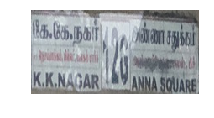

In [14]:
img = open_image('/content/drive/My Drive/bus_5routes/12G/small_IMG_3867.JPG')
img.show()


In [15]:
img.data.shape


torch.Size([3, 100, 200])

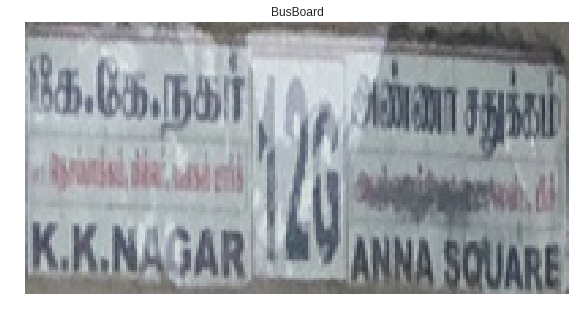

In [16]:
img.show(figsize=(100, 5), title='BusBoard')


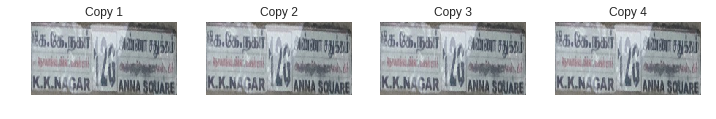

In [17]:
_,axs = plt.subplots(1,4,figsize=(12,4))
for i,ax in enumerate(axs): img.show(ax=ax, title=f'Copy {i+1}')

In [0]:
np.random.seed(2)

tfms = get_transforms(do_flip=False)

data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms)
        .databunch().
        normalize(imagenet_stats))



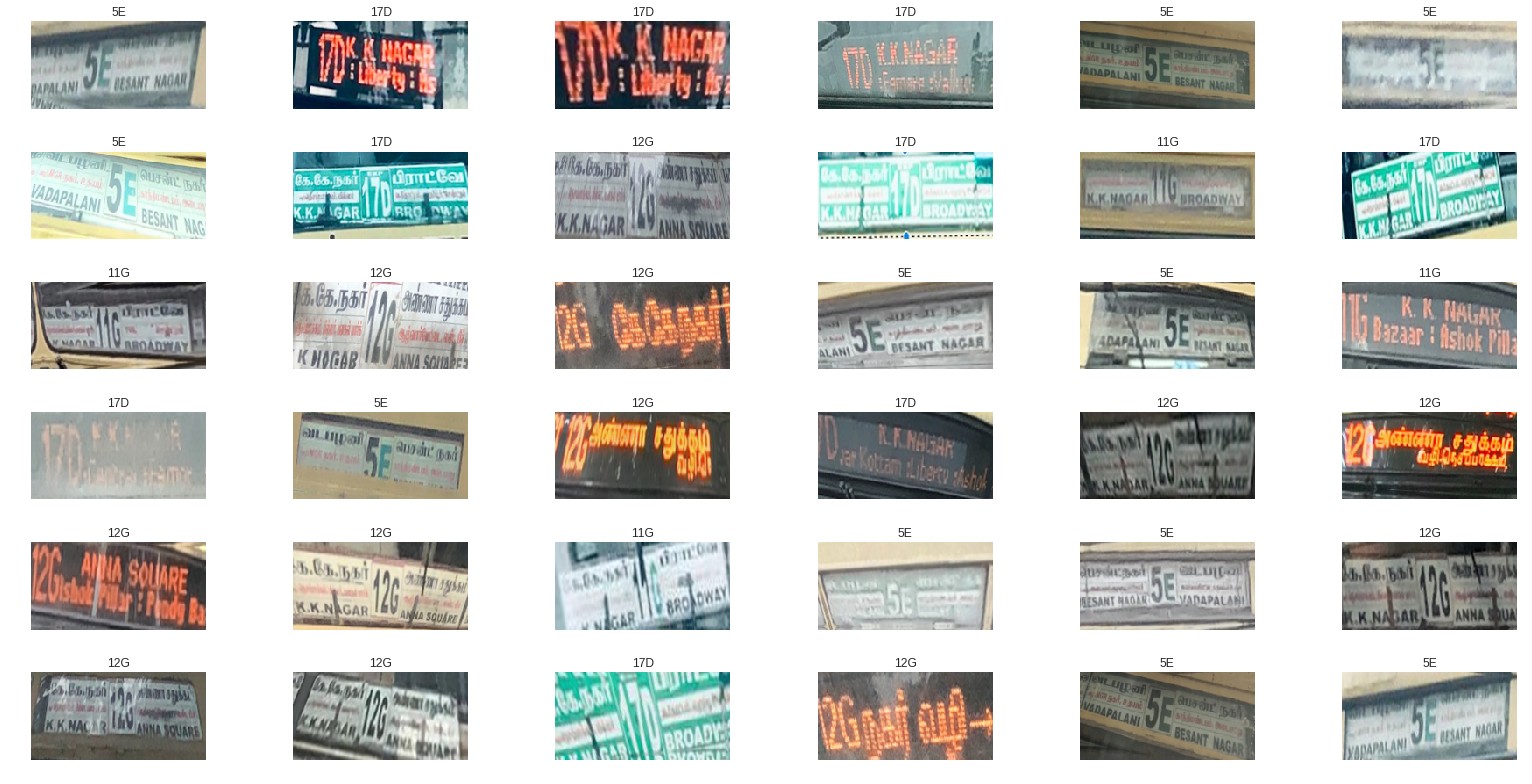

In [20]:
data.show_batch(rows=6, figsize=(22,11))


In [21]:
print(data.classes)


['17D', '12G', '11H', '5E', '11G']


In [22]:
len(data.classes)


5

In [23]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 28409096.84it/s]


In [26]:
learn.fit_one_cycle(3)


e,p,o,c,h,,,t,r,a,i,n,_,l,o,s,s,,,v,a,l,i,d,_,l,o,s,s,,,e,r,r,o,r,_,r,a,t,e
1,,,,,,,1,.,7,9,2,1,1,5,,,,,1,.,3,7,8,1,2,7,,,,,0,.,6,0,5,2,6,3,,
2,,,,,,,1,.,4,6,5,6,8,4,,,,,0,.,9,5,3,1,1,1,,,,,0,.,3,7,7,1,9,3,,
3,,,,,,,1,.,2,0,8,7,9,2,,,,,0,.,8,1,2,9,9,0,,,,,0,.,3,3,3,3,3,3,,


In [0]:
 filename = '/content/drive/My Drive/dataset_fastai/small_image193.png'


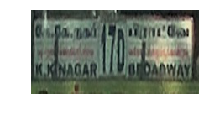

In [28]:
img = open_image(filename)
img.show()



In [29]:

losses = learn.predict(img)
prediction = losses[0];
prediction

'17D'

In [0]:
filename = '/content/drive/My Drive/dataset_fastai/small_IMG_4008.JPG'


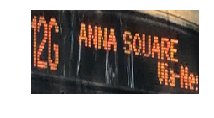

In [31]:
img = open_image(filename)
img.show()


In [32]:
losses = learn.predict(img)
prediction = losses[0];
prediction

'12G'

In [0]:
filename = '/content/drive/My Drive/dataset_fastai/test1.jpg'


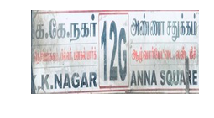

In [34]:
img = open_image(filename)
img.show()

In [35]:
losses = learn.predict(img)
prediction = losses[0];
prediction

'12G'

In [0]:
learn.save('stage1-fit1cycle')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

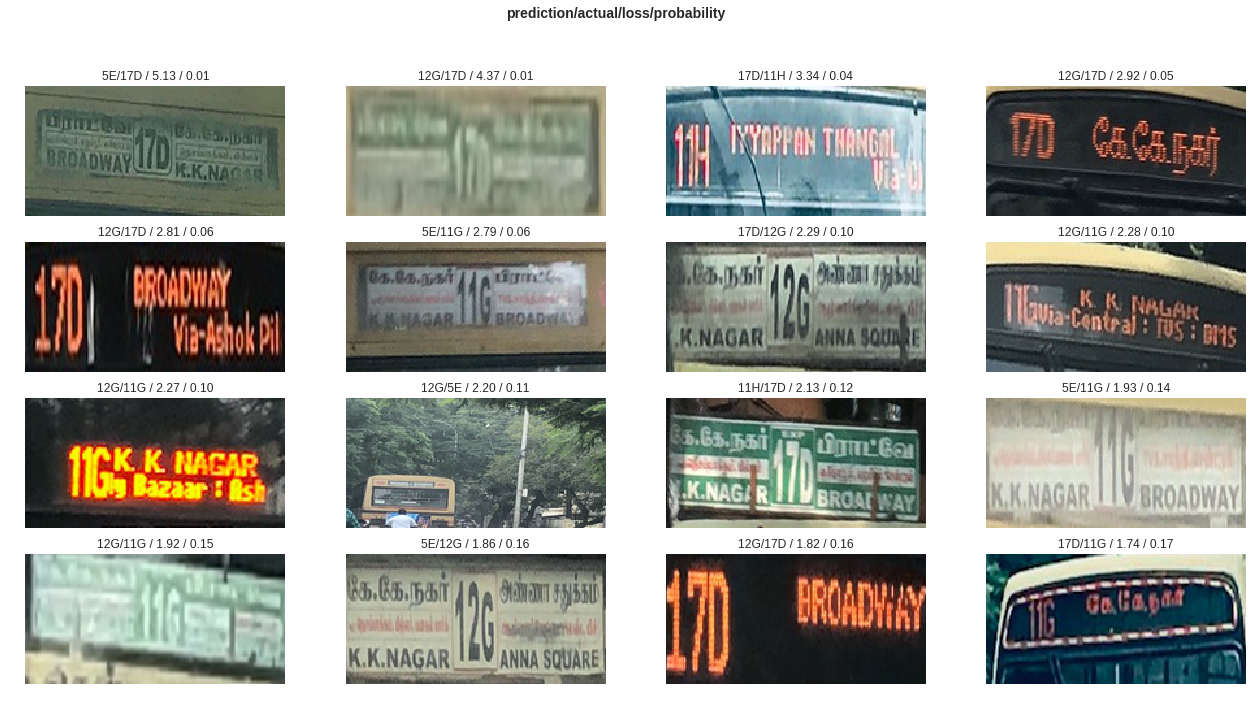

In [38]:
interp.plot_top_losses(16, figsize=(22,11))

In [39]:
interp.most_confused(min_val=2)

[('12G', '17D', 8), ('17D', '12G', 7), ('11G', '5E', 6), ('11G', '12G', 3)]

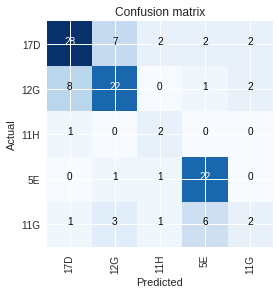

In [40]:
interp.plot_confusion_matrix()

In [53]:
learn.load('stage1-fit1cycle')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (460 items)
[Category 17D, Category 17D, Category 17D, Category 17D, Category 17D]...
Path: /content/drive/My Drive/bus_5routes
x: ImageItemList (460 items)
[Image (3, 100, 200), Image (3, 100, 200), Image (3, 100, 200), Image (3, 100, 200), Image (3, 100, 200)]...
Path: /content/drive/My Drive/bus_5routes;
Valid: LabelList
y: CategoryList (114 items)
[Category 11G, Category 17D, Category 5E, Category 17D, Category 17D]...
Path: /content/drive/My Drive/bus_5routes
x: ImageItemList (114 items)
[Image (3, 100, 200), Image (3, 100, 200), Image (3, 100, 200), Image (3, 100, 200), Image (3, 100, 200)]...
Path: /content/drive/My Drive/bus_5routes;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=

In [0]:
learn.unfreeze()

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


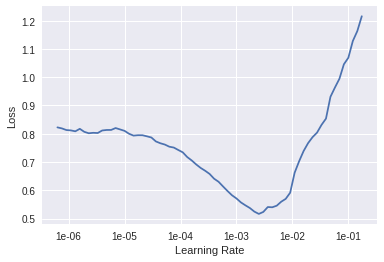

In [56]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-2))


e,p,o,c,h,,,t,r,a,i,n,_,l,o,s,s,,,v,a,l,i,d,_,l,o,s,s,,,e,r,r,o,r,_,r,a,t,e
1,,,,,,,0,.,1,7,2,1,4,2,,,,,0,.,3,9,0,6,6,4,,,,,0,.,1,0,5,2,6,3,,
2,,,,,,,0,.,1,6,3,4,4,1,,,,,0,.,3,5,5,8,3,6,,,,,0,.,0,8,7,7,1,9,,
3,,,,,,,0,.,2,6,2,0,0,0,,,,,0,.,3,5,9,9,9,3,,,,,0,.,0,7,8,9,4,7,,
4,,,,,,,0,.,2,3,2,9,3,4,,,,,0,.,9,7,6,7,9,7,,,,,0,.,1,7,5,4,3,9,,
5,,,,,,,0,.,1,9,9,8,2,3,,,,,0,.,2,8,2,7,2,6,,,,,0,.,0,9,6,4,9,1,,
6,,,,,,,0,.,1,6,8,8,7,3,,,,,0,.,2,5,4,7,4,3,,,,,0,.,0,6,1,4,0,4,,


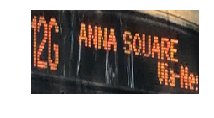

In [59]:
filename = '/content/drive/My Drive/dataset_fastai/small_IMG_4008.JPG'
img = open_image(filename)
img.show()


In [60]:
losses = learn.predict(img)
prediction = losses[0];
prediction

'12G'